In [1]:
import numpy as np
import pyfirmata as pyF
from time import sleep
import os
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy import constants as cons


#####################################
## COMUNICACION
#####################################
port = 'com5'
board = pyF.Arduino(port)

it = pyF.util.Iterator(board)               #Estas lineas garantizan comunicacion con la tarjeta.
it.start()



######################################
##VECTORES
######################################
led=[1.6325,2.424,2.566,3.7095]
lamb=[1.10e6,1.60514e6,1.70648e6,2.14133e6]

volt_IR=[]
volt_red=[]
volt_blue=[]
volt_green=[]
volt_orange=[]


curr_IR=[]
curr_red=[]
curr_blue=[]
curr_green=[]
curr_orange=[]




In [3]:

#####################################
## LECTURA DE PINES
#####################################
a0 = board.get_pin('a:0:i')                 #a=analogo (d=digital), i=input (o=output,p=pwd)
a1 = board.get_pin('a:1:i') 

try:
    while True:
        p0 = a0.read()
        p1 = a1.read()
        
        if (isinstance(p0,float) == True and  isinstance(p1,float) == True):     #Verifica si la variable es un float.    
            p0 = p0*5.0
            p1 = p1*5.0
            V=p0
            # I=
            print ('%.5f V %.5f V' %(p0,p1))
            sleep(1)                        #En este cod. las unidades son en segundos, no milisegundos.



except KeyboardInterrupt:                   #Nos permite salir del codigo mas facilmente.
    board.exit()
    os._exit()

0.00000 V 0.00000 V
0.00000 V 0.00000 V
0.00000 V 0.00000 V
0.00000 V 0.00000 V
0.00000 V 0.00000 V
0.11250 V 0.00000 V
0.67450 V 0.00000 V
0.75750 V 0.00000 V
1.28050 V 0.00000 V
1.70100 V 0.00000 V
2.14100 V 0.00000 V
2.47800 V 0.00000 V
2.94250 V 0.00000 V
3.15750 V 0.00000 V
3.33350 V 0.03400 V
3.55350 V 0.17100 V
3.33350 V 0.03900 V
3.15250 V 0.00000 V
3.10850 V 0.00000 V
3.40200 V 0.07350 V
3.40200 V 0.07350 V
3.40200 V 0.07350 V
3.33800 V 0.03900 V
3.32850 V 0.03400 V
3.31400 V 0.02950 V
3.27950 V 0.01950 V
3.26000 V 0.01000 V
3.25000 V 0.01000 V
3.23550 V 0.00500 V
3.19150 V 0.00000 V
3.19150 V 0.00000 V
3.21100 V 0.00000 V
3.26500 V 0.01000 V
3.26000 V 0.01000 V
3.26500 V 0.01450 V
3.19650 V 0.00000 V
3.19150 V 0.00000 V
3.20150 V 0.00000 V
3.27450 V 0.01450 V
3.27000 V 0.01450 V
3.19650 V 0.00000 V
3.19650 V 0.00000 V
3.19650 V 0.00000 V
3.19650 V 0.00000 V
3.19650 V 0.00000 V
3.19650 V 0.00000 V
3.28950 V 0.01950 V
3.29900 V 0.02450 V
3.28450 V 0.01950 V
3.27950 V 0.01950 V


TypeError: Required argument 'status' (pos 1) not found

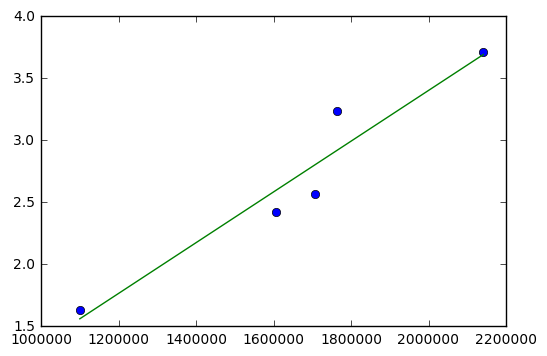

r:  0.961198672107
pendiente:  2.04655999711e-06
error:  3.39105458877e-07
h_planck:  1.09374018356e-33
h_real:  6.62607004e-34
error_h:  0.650661971511


In [7]:



led=[1.6325,2.424,2.566,3.24050,3.7095]
lamb=[1.10e6,1.60514e6,1.70648e6,1.76367e6,2.14133e6]
slope, intercept, r_value, p_value, std_err = stats.linregress(lamb,led)
x=np.linspace(lamb[0],lamb[-1],100)
y=slope*x+intercept
plt.plot(lamb,led,'o')
plt.plot(x,y,'-')
plt.show()
h_planck=slope*cons.e/cons.c
h=cons.h
error=(h_planck-h)/h
print ('r: ',r_value)
print ('pendiente: ',slope)
print ('error: ',std_err)
print ('h_planck: ',h_planck)
print ('h_real: ',h)
print ('error_h: ',error)